## Setup

In [1]:
import tensorflow as tf

## Variables

In [2]:
x = tf.zeros([10, 10])
x += 2

print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [3]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0

v.assign(3.0)
assert v.numpy() == 3.0

v.assign(tf.square(v))
assert v.numpy() == 9.0

## Fit a linear model

### Define the model

In [4]:
class Model:
    def __init__(self):
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
        
    def __call__(self, x):
        return self.W * x + self.b

In [5]:
model = Model()

In [6]:
assert model(3.0).numpy() == 15.0

### Define a loss function

In [7]:
def loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

### Obtain training data

In [8]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise  = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

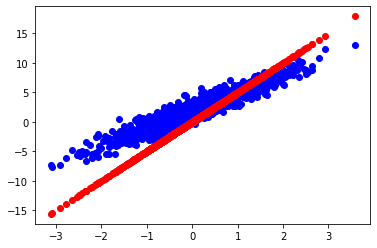

Current loss: 8.830891


In [9]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

### Define training loop

In [10]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss(outputs, model(inputs))
    dW, db = tape.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=8.83089
Epoch  1: W=4.60 b=0.38, loss=6.05278
Epoch  2: W=4.28 b=0.69, loss=4.26414
Epoch  3: W=4.02 b=0.94, loss=3.11254
Epoch  4: W=3.81 b=1.14, loss=2.37109
Epoch  5: W=3.64 b=1.30, loss=1.89372
Epoch  6: W=3.51 b=1.42, loss=1.58636
Epoch  7: W=3.40 b=1.53, loss=1.38847
Epoch  8: W=3.32 b=1.61, loss=1.26106
Epoch  9: W=3.25 b=1.68, loss=1.17902


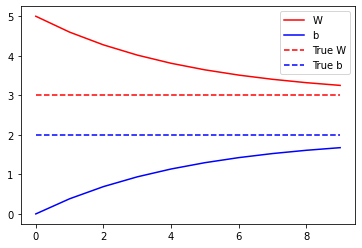

In [11]:
model = Model()

Ws, bs = [], []
epochs = range(10)

for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(outputs, model(inputs))
    
    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()